# Data Mining Project

We are handeling a dataset of credit cards for diffetent costumers attributes about their Balance, transactions, transaction frequencies and payments.

Following is the Data Dictionary for Credit Card dataset :<br>

CUSTID : Identification of Credit Card holder (Categorical)<br>

BALANCE : Balance amount left in their account to make purchases <br>

BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) <br>

PURCHASES : Amount of purchases made from account <br>

ONEOFFPURCHASES : Maximum purchase amount done in one- <br>

INSTALLMENTSPURCHASES : Amount of purchase done in installment <br>

CASHADVANCE : Cash in advance given by the user <br>

PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) <br>

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) <br>

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) <br>

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid <br>

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced" <br>

PURCHASESTRX : Numbe of purchase transactions made <br>

CREDITLIMIT : Limit of Credit Card for user <br>

PAYMENTS : Amount of Payment done by user <br>

MINIMUM_PAYMENTS : Minimum amount of payments made by user <br>

PRCFULLPAYMENT : Percent of full payment paid by user <br>

TENURE : Tenure of credit card service for user

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import zscore
import pydotplus 
import graphviz
from IPython.display import Image

In [3]:
df = pd.read_csv("CC GENERAL.csv")

array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

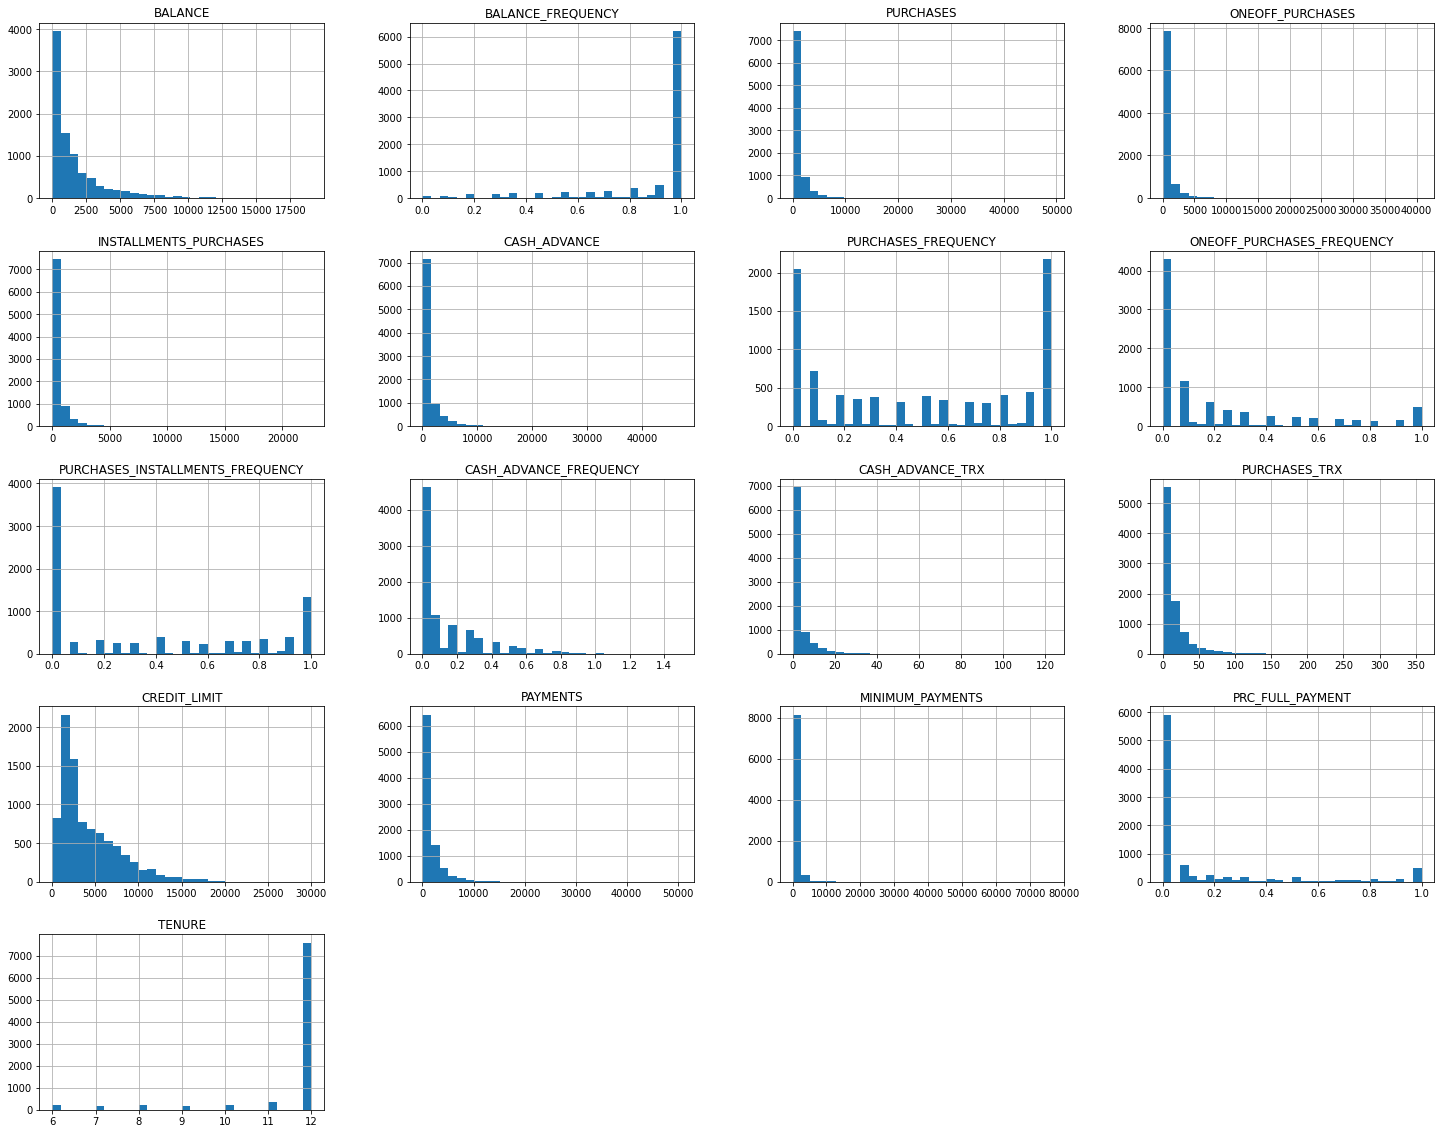

In [4]:
df.hist(figsize=(25,20), bins=30)

# 1. Data Preprocessing:
## 1.1. missing values:
We look for the missing values in the data and we replace them with the mean of the respective attribute

In [5]:
# find missing values
print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col, df[col].isna().sum()))

Number of missing values:
	CUST_ID: 0
	BALANCE: 0
	BALANCE_FREQUENCY: 0
	PURCHASES: 0
	ONEOFF_PURCHASES: 0
	INSTALLMENTS_PURCHASES: 0
	CASH_ADVANCE: 0
	PURCHASES_FREQUENCY: 0
	ONEOFF_PURCHASES_FREQUENCY: 0
	PURCHASES_INSTALLMENTS_FREQUENCY: 0
	CASH_ADVANCE_FREQUENCY: 0
	CASH_ADVANCE_TRX: 0
	PURCHASES_TRX: 0
	CREDIT_LIMIT: 1
	PAYMENTS: 0
	MINIMUM_PAYMENTS: 313
	PRC_FULL_PAYMENT: 0
	TENURE: 0


In [6]:
# replace the missing values with the mean 
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].replace(np.NaN, df["CREDIT_LIMIT"].mean())
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].replace(np.NaN, df["MINIMUM_PAYMENTS"].mean())

Now we split the data into two dataframes to better analyse the data and visualize the results, we keep the attribute "CUST_ID" in both dataframes to be able to rejoin the data if we need to

In [7]:
df_frequencies = df.iloc[:,[0,2,7,8,9,10,16]]
df_values = df.iloc[:,[0,1,3,4,5,6,11,12,13,14,15,17]]

## 1.2. outlier detection and removal:
Next we show the boxplots of the data to identify the outliers and remove them:

<AxesSubplot:>

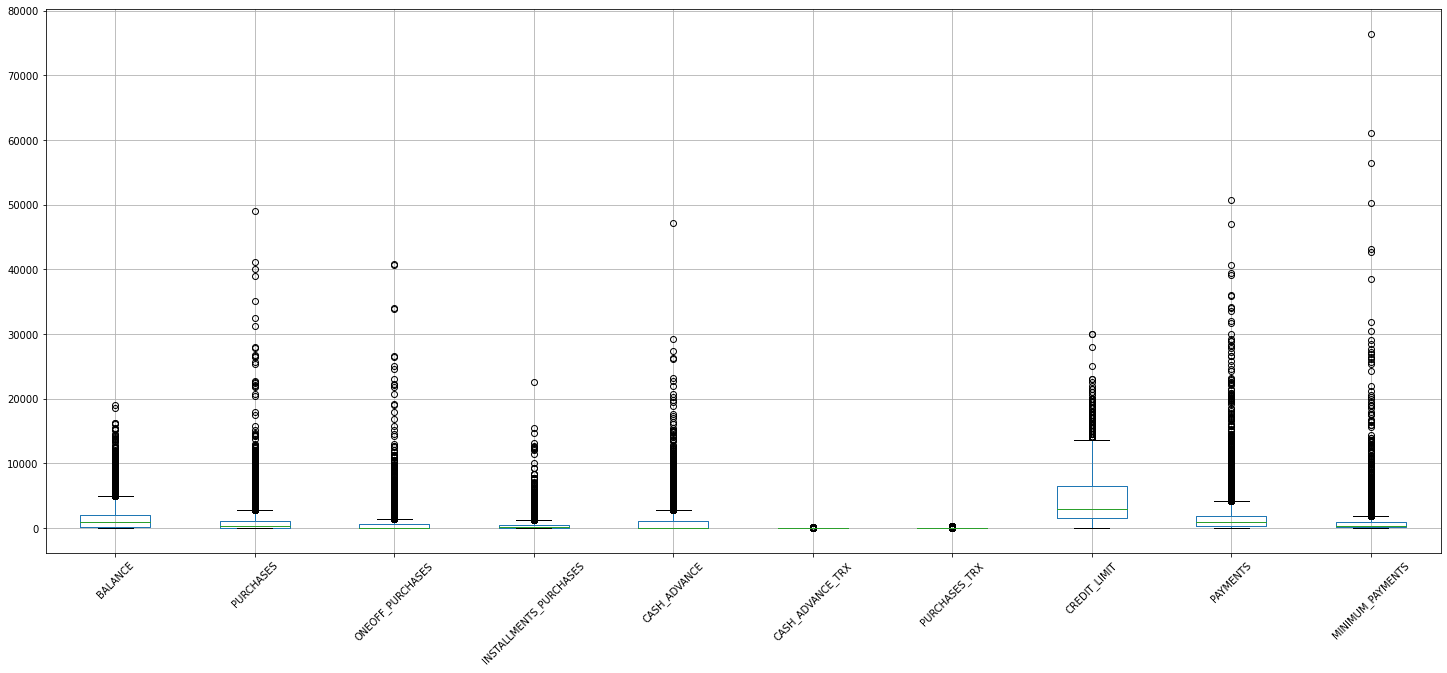

In [8]:
# Boxplot before removing outliers
df_values.drop(["TENURE"], axis=1).boxplot(figsize=(25,10), rot=45)

we have defined two functions for outlier removal one based on the IQR and the other on the standard deviation and to avoid removing too many data points we decided to use the standard deviation approach

In [9]:
def remove_outliers_iqr(df: pd.DataFrame, attributes_list: list) -> pd.DataFrame:
    for att in attributes_list:
        Q1 = df[att].quantile(0.25)
        Q3 = df[att].quantile(0.75)
        IQR = Q3 - Q1    #IQR is interquartile range. 
        filter = (df[att] >= Q1 - 1.5 * IQR) & (df[att] <= Q3 + 1.5 *IQR)
        df = df.loc[filter]
    return df

def remove_outliers_std(df: pd.DataFrame, attributes_list: list) -> pd.DataFrame:
    for att in attributes_list:
        std = df[att].std()
        median = df[att].median() 
        filter = (df[att] <= median + 5*std)
        df = df.loc[filter]
    return df

next we show a boxplot of the Data without outliers:

<AxesSubplot:>

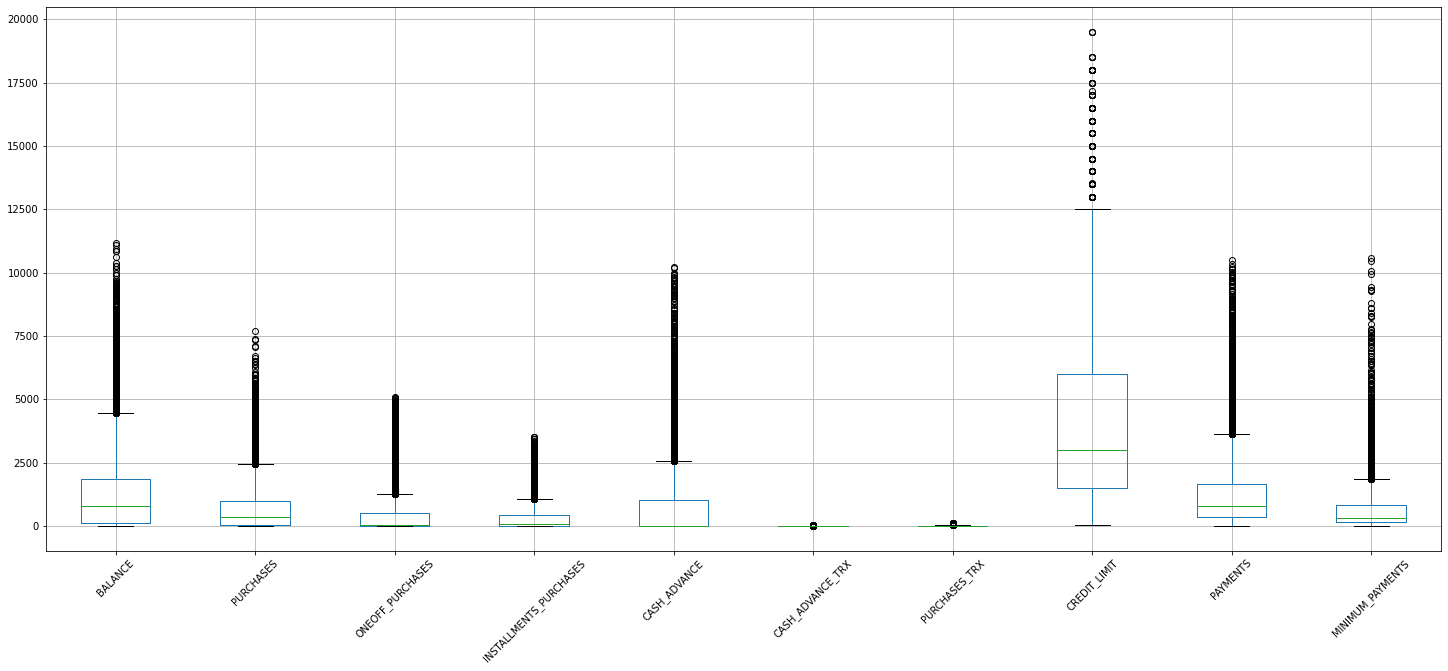

In [10]:
# Boxplot after removing the outliers
df_values = remove_outliers_std(df_values, df_values.columns[1:-1])
df_frequencies = remove_outliers_std(df_frequencies, df_frequencies.columns[1:])
df_values.drop(["TENURE"], axis=1).boxplot(figsize=(25,10), rot=45)

# 1.3. Normalization:
Then we normalize the data using the z-score normalization:

<AxesSubplot:>

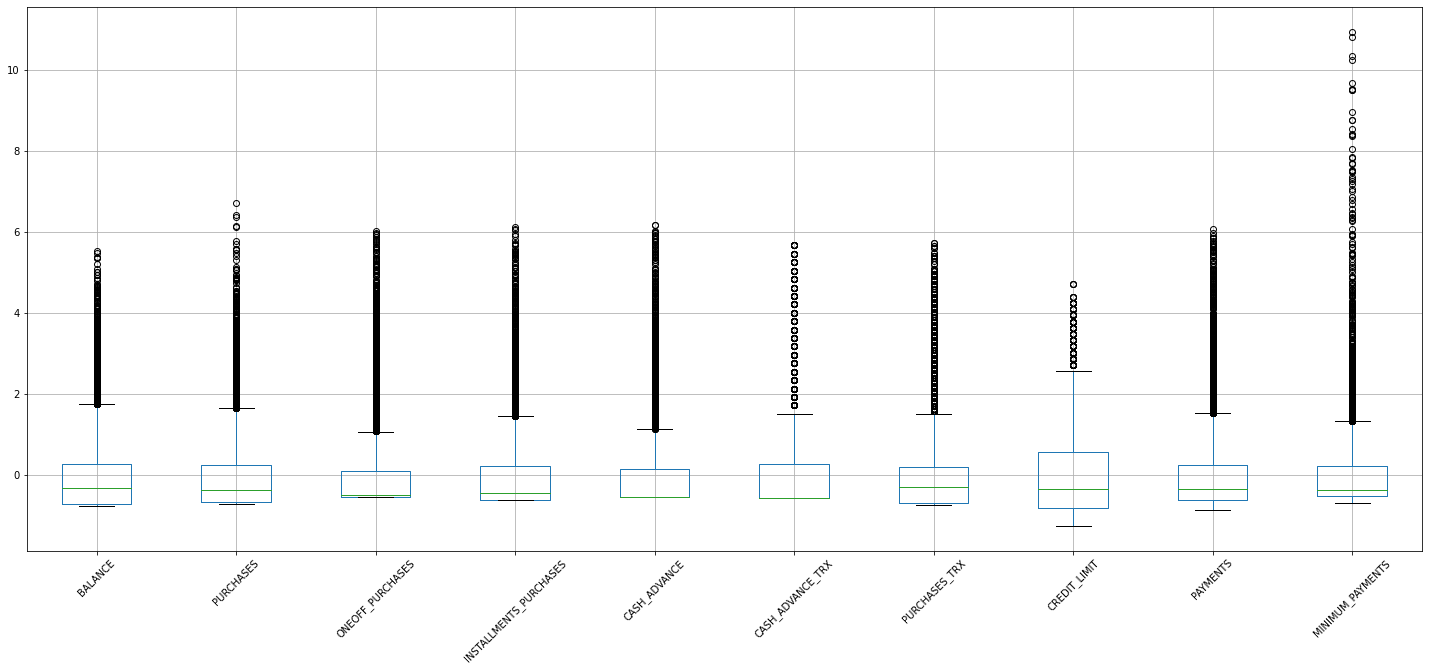

In [11]:
# normalize data
for col in df_values.columns[1:-1]:
  df_values.loc[:, col] = zscore(df_values[col])
df_values.drop(["TENURE"], axis=1).boxplot(figsize=(25,10), rot=45)

# 1.4. Check for duplicates:
We also check for duplicates in the data

In [12]:
# There are no duplicated data
dups = df.duplicated().sum() # this value is 0
print(f'the number of duplicates is {dups}')

the number of duplicates is 0


## 1.5. Correlation analysis:
We do some correlation analysis between the attributes of our data set (Pearson Correlation, Spearman Correlation)

In [13]:
pearson_matrix_values = df_values[:-1].corr(method='pearson')
spearman_matrix_values = df_values[:-1].corr(method='spearman')

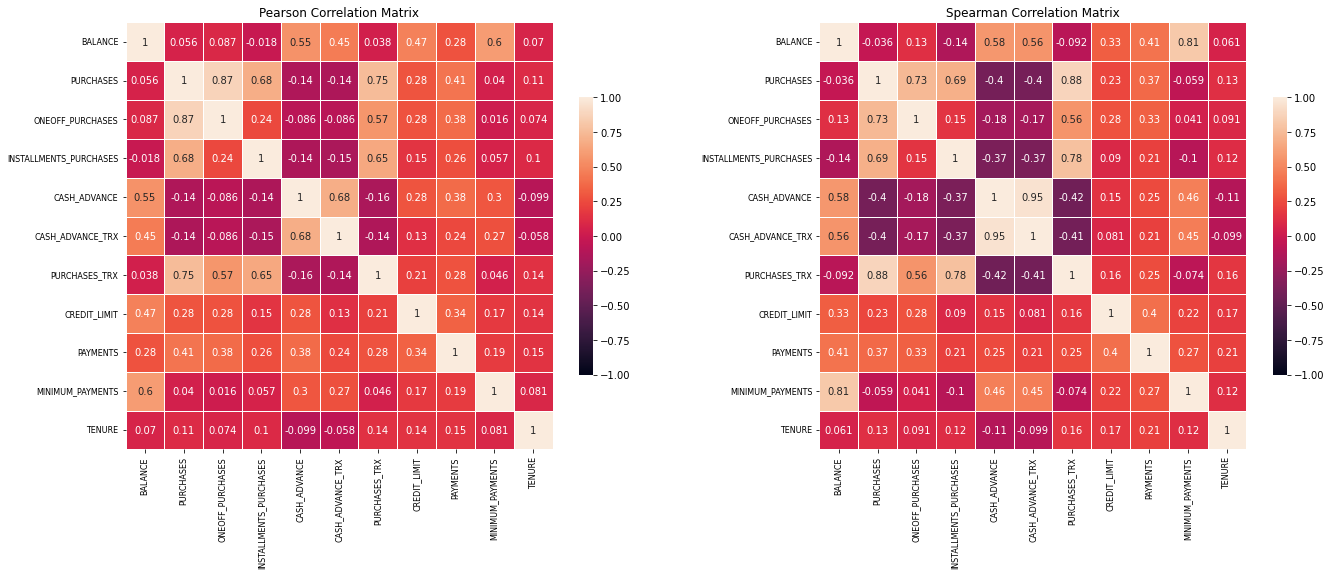

In [14]:
columns = list(df_values.columns[1:])
f, axes = plt.subplots(figsize=(22, 17), ncols=2)
sns.heatmap(pearson_matrix_values, vmin = -1, vmax=1, linewidths=.5, square=True, annot=True, xticklabels = columns, yticklabels = columns, annot_kws={"size": 10}, ax=axes[0], cbar_kws={'shrink': 0.3})
axes[0].set_xticklabels(axes[0].get_xmajorticklabels(), fontsize = 8)
axes[0].set_yticklabels(axes[0].get_ymajorticklabels(), fontsize = 8)
axes[0].set_title('Pearson Correlation Matrix')
sns.heatmap(spearman_matrix_values, vmin = -1, vmax=1, linewidths=.5, square=True, annot=True, xticklabels = columns, yticklabels = columns, annot_kws={"size": 10}, ax=axes[1], cbar_kws={'shrink': 0.3})
axes[1].set_xticklabels(axes[1].get_xmajorticklabels(), fontsize = 8)
axes[1].set_yticklabels(axes[1].get_ymajorticklabels(), fontsize = 8)
axes[1].set_title('Spearman Correlation Matrix')
f.subplots_adjust(wspace=0.3)
plt.show()

We can visualize how some attribute pairs, which have a high correlation coefficient look like ploted in a scatter map; we will take (BALANCE and MINIMUM_PAYMENTS) and (CASH_ADVANCE and PURCHASES_TRX) and (CASH_ADVANCE and CASH_ADVANCE_TRX)

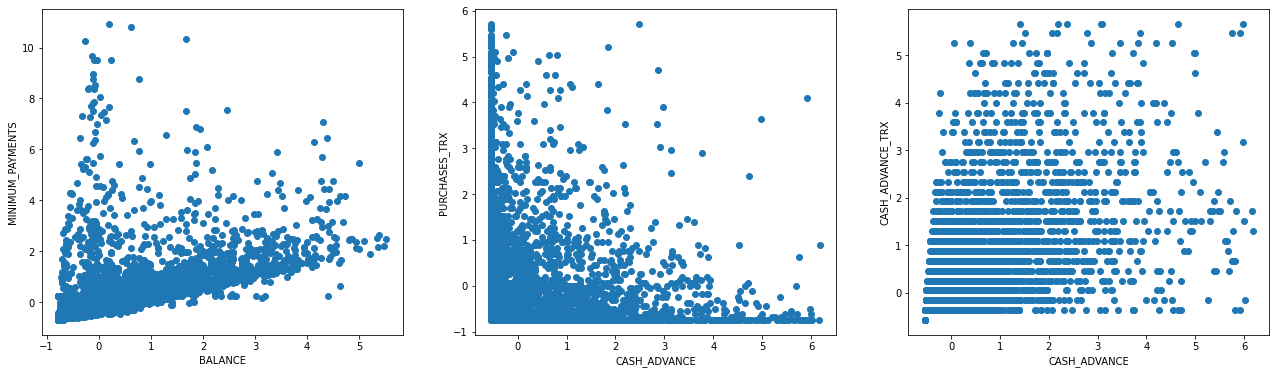

In [15]:
f, axes = plt.subplots(figsize=(22, 6), ncols=3)
axes[0].scatter(df_values["BALANCE"], df_values["MINIMUM_PAYMENTS"])
axes[0].set_xlabel('BALANCE')
axes[0].set_ylabel('MINIMUM_PAYMENTS')
axes[1].scatter(df_values["CASH_ADVANCE"], df_values["PURCHASES_TRX"])
axes[1].set_xlabel('CASH_ADVANCE')
axes[1].set_ylabel('PURCHASES_TRX')
axes[2].scatter(df_values["CASH_ADVANCE"], df_values["CASH_ADVANCE_TRX"])
axes[2].set_xlabel('CASH_ADVANCE')
axes[2].set_ylabel('CASH_ADVANCE_TRX')
plt.show()

We can see that the correlation is clear between BALANCE and MINIMUM_PAYMENTS, but less clear between CASH_ADVANCE and PURCHASES_TRX.

In [16]:
# analyse correlation for the frequencies dataframe
pearson_matrix_freq = df_frequencies.corr(method='pearson')
spearman_matrix_freq = df_frequencies.corr(method='spearman')

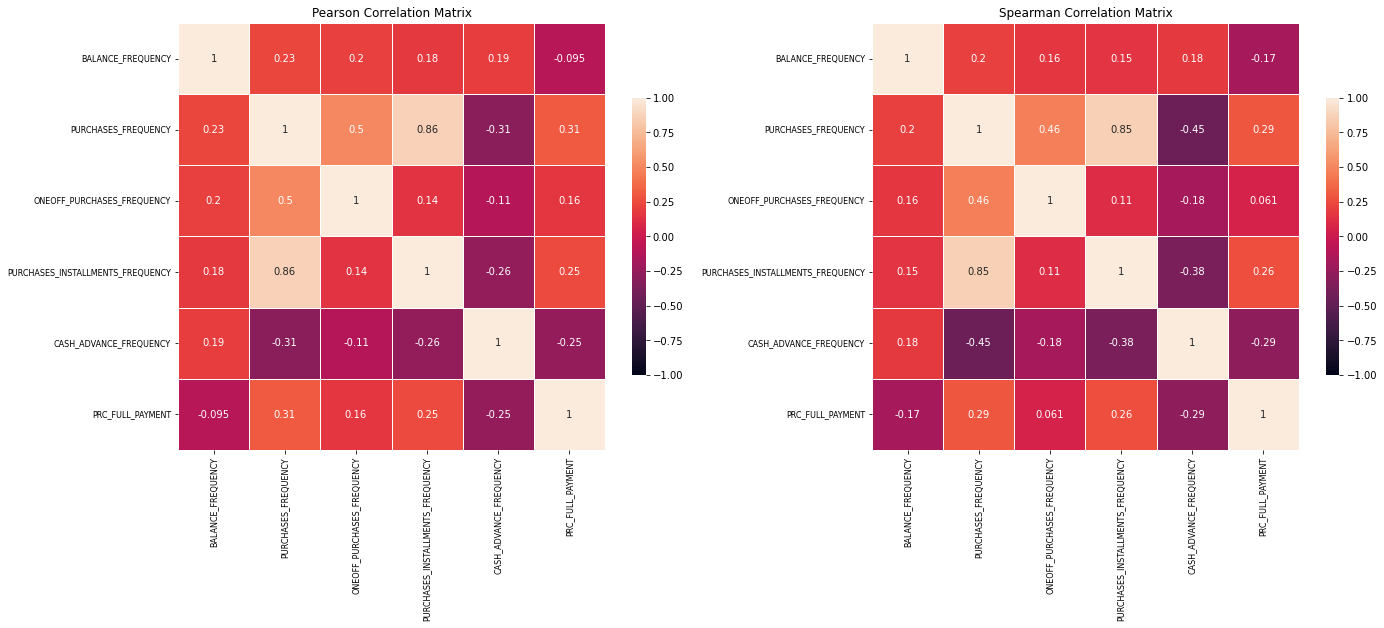

In [17]:
columns = list(df_frequencies.columns[1:])
f, axes = plt.subplots(figsize=(22, 17), ncols=2)
sns.heatmap(pearson_matrix_freq, vmin = -1, vmax=1, linewidths=.5, square=True, annot=True, xticklabels = columns, yticklabels = columns, annot_kws={"size": 10}, ax=axes[0], cbar_kws={'shrink': 0.3})
axes[0].set_xticklabels(axes[0].get_xmajorticklabels(), fontsize = 8)
axes[0].set_yticklabels(axes[0].get_ymajorticklabels(), fontsize = 8)
axes[0].set_title('Pearson Correlation Matrix')
sns.heatmap(spearman_matrix_freq, vmin = -1, vmax=1, linewidths=.5, square=True, annot=True, xticklabels = columns, yticklabels = columns, annot_kws={"size": 10}, ax=axes[1], cbar_kws={'shrink': 0.3})
axes[1].set_xticklabels(axes[1].get_xmajorticklabels(), fontsize = 8)
axes[1].set_yticklabels(axes[1].get_ymajorticklabels(), fontsize = 8)
axes[1].set_title('Spearman Correlation Matrix')
f.subplots_adjust(wspace=0.3)
plt.show()

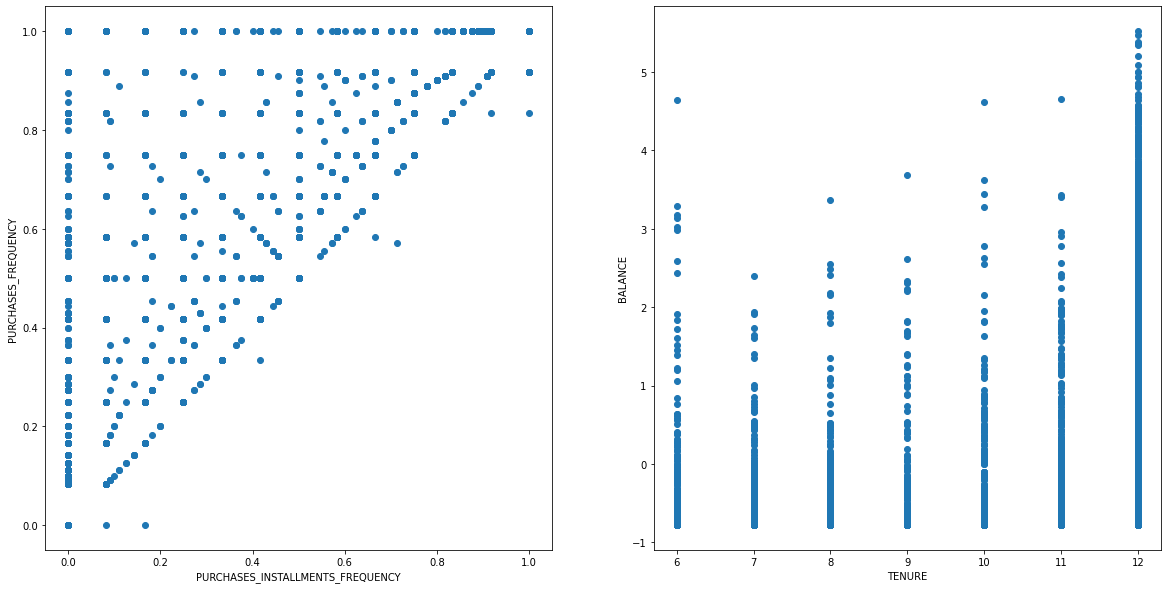

In [18]:
f, axes = plt.subplots(figsize=(20, 10), ncols=2)
axes[0].scatter(df_frequencies['PURCHASES_INSTALLMENTS_FREQUENCY'], df_frequencies['PURCHASES_FREQUENCY'])
axes[0].set_xlabel('PURCHASES_INSTALLMENTS_FREQUENCY')
axes[0].set_ylabel('PURCHASES_FREQUENCY')
axes[1].scatter(df_values['TENURE'], df_values['BALANCE'])
axes[1].set_xlabel('TENURE')
axes[1].set_ylabel('BALANCE')
plt.show()


for example we can see that PURCHASES_INSTALLMENTS_FREQUENCY is correlated with PURCHASES_FREQUENCY because a purchase in installements would imply a purchase but not the other way around, so we can only observe points on and above the diagonal of the scatter plot (except for some points that we consider incvlaid)

# 2. Sampling the Data:
we create some samples of the data using different sampling methods. We can see that the boxplots of the samples look very similar to the boxplots of the original data.

<AxesSubplot:>

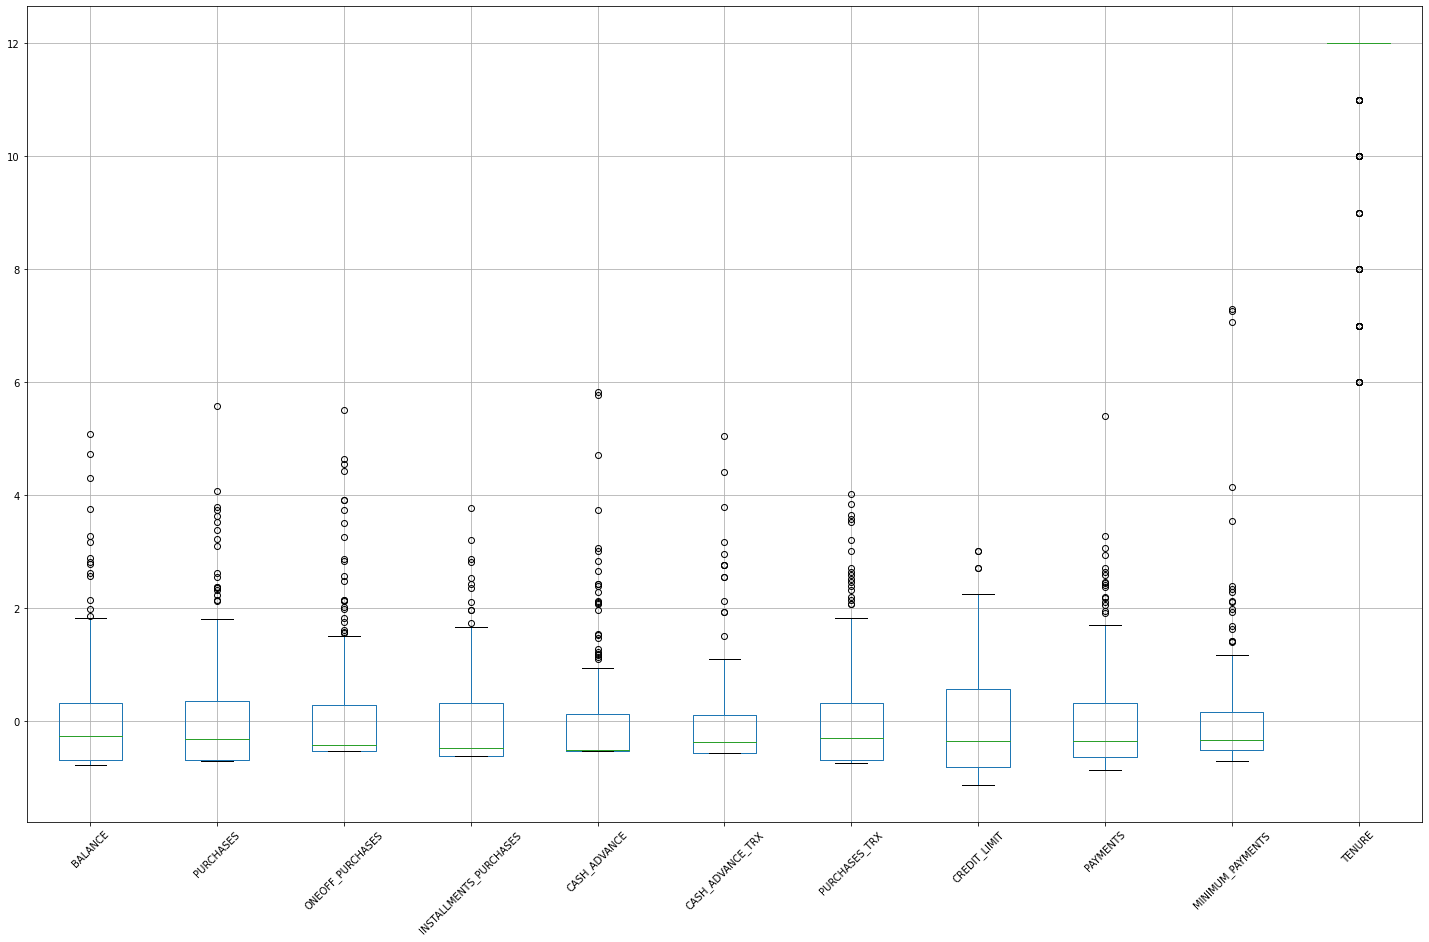

In [19]:
# a sample of a 200 data entries with replacement
sample_100_valuess = df_values.sample(n=200, replace=True)
sample_100_freq = df_frequencies.sample(n=200, replace=True)
sample_100_valuess.boxplot(figsize=(25,15), rot=45)

<AxesSubplot:>

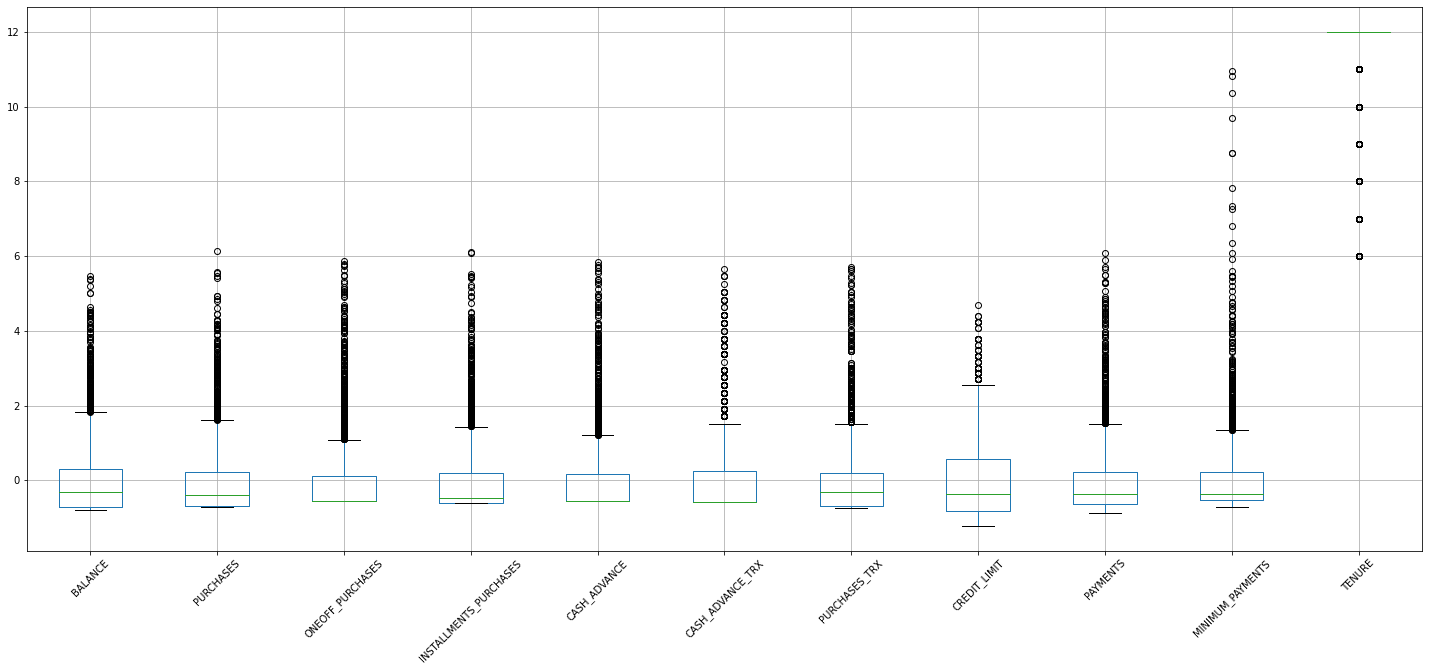

In [20]:
# a sample of a 30% of the data with and without replacement
sample_3rd_values = df_values.sample(frac=0.3, replace=False, ignore_index=True)
sample_3rd_freq = df_frequencies.sample(frac=0.3, replace=True)
sample_3rd_values.boxplot(figsize=(25,10), rot=45)

<AxesSubplot:>

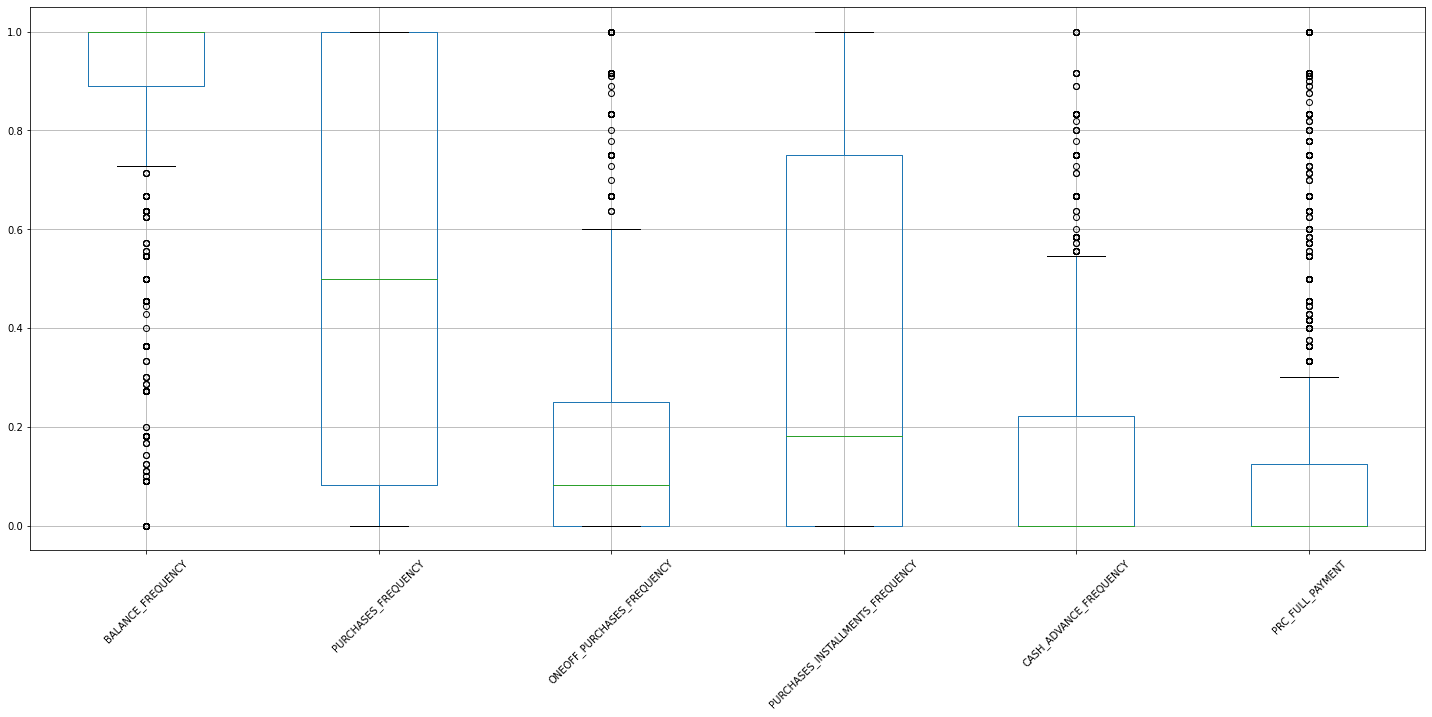

In [21]:
sample_3rd_freq.boxplot(figsize=(25,10), rot=45)

When sampling with replacement we get duplicated entries

In [22]:
dup1 = sample_3rd_freq.duplicated().sum()
dup2 = sample_3rd_values.duplicated().sum()
print(f'number of duplicates in the values sample: {dup2}')
print(f'number of duplicates in the frequencies sample: {dup1}')

number of duplicates in the values sample: 0
number of duplicates in the frequencies sample: 344


# 3. Classification:
We create a binary class (In-Dept, not In-Dept) and set some labels for the sample set "sample_3rd_values" and we implement a decision tree classifier.<br>
We add dummy labels to a sample of the data so we can create our model and we then apply the model to a test data set. 

In [23]:
# add labels to the sample
sample_3rd_values.loc[sample_3rd_values['BALANCE'] < sample_3rd_values['BALANCE'].quantile(0.25), 'CLASS'] = "In-Dept"
sample_3rd_values.loc[sample_3rd_values['BALANCE'] >= sample_3rd_values['BALANCE'].quantile(0.25), 'CLASS'] = "not In-Dept"

test_set = sample_3rd_values.sample(frac=0.2, replace=False, ignore_index=True) # 20% validation set
model_building_set = sample_3rd_values.drop(test_set.index) # 80% of the set to build the model

In [24]:
# creat the decision tree
from sklearn import tree

Y = model_building_set['CLASS']
X = model_building_set.drop(['CUST_ID','CLASS', 'BALANCE'], axis=1)

clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=4)
clf = clf.fit(X, Y)

[Text(158.43214285714285, 195.696, 'X[8] <= -0.511\ngini = 0.375\nsamples = 2014\nvalue = [504, 1510]'),
 Text(77.72142857142858, 152.208, 'X[0] <= 0.293\ngini = 0.445\nsamples = 620\nvalue = [413, 207]'),
 Text(47.82857142857143, 108.72, 'X[3] <= -0.395\ngini = 0.35\nsamples = 495\nvalue = [383, 112]'),
 Text(23.914285714285715, 65.232, 'X[1] <= 0.596\ngini = 0.236\nsamples = 424\nvalue = [366, 58]'),
 Text(11.957142857142857, 21.744, 'gini = 0.206\nsamples = 412\nvalue = [364, 48]'),
 Text(35.871428571428574, 21.744, 'gini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(71.74285714285715, 65.232, 'X[8] <= -0.644\ngini = 0.364\nsamples = 71\nvalue = [17, 54]'),
 Text(59.785714285714285, 21.744, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(83.7, 21.744, 'gini = 0.267\nsamples = 63\nvalue = [10, 53]'),
 Text(107.61428571428571, 108.72, 'X[8] <= -0.634\ngini = 0.365\nsamples = 125\nvalue = [30, 95]'),
 Text(95.65714285714286, 65.232, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Te

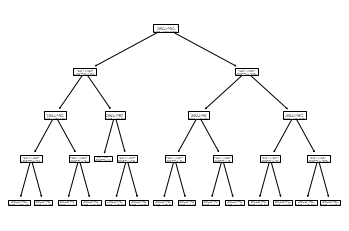

In [25]:
tree.plot_tree(clf)

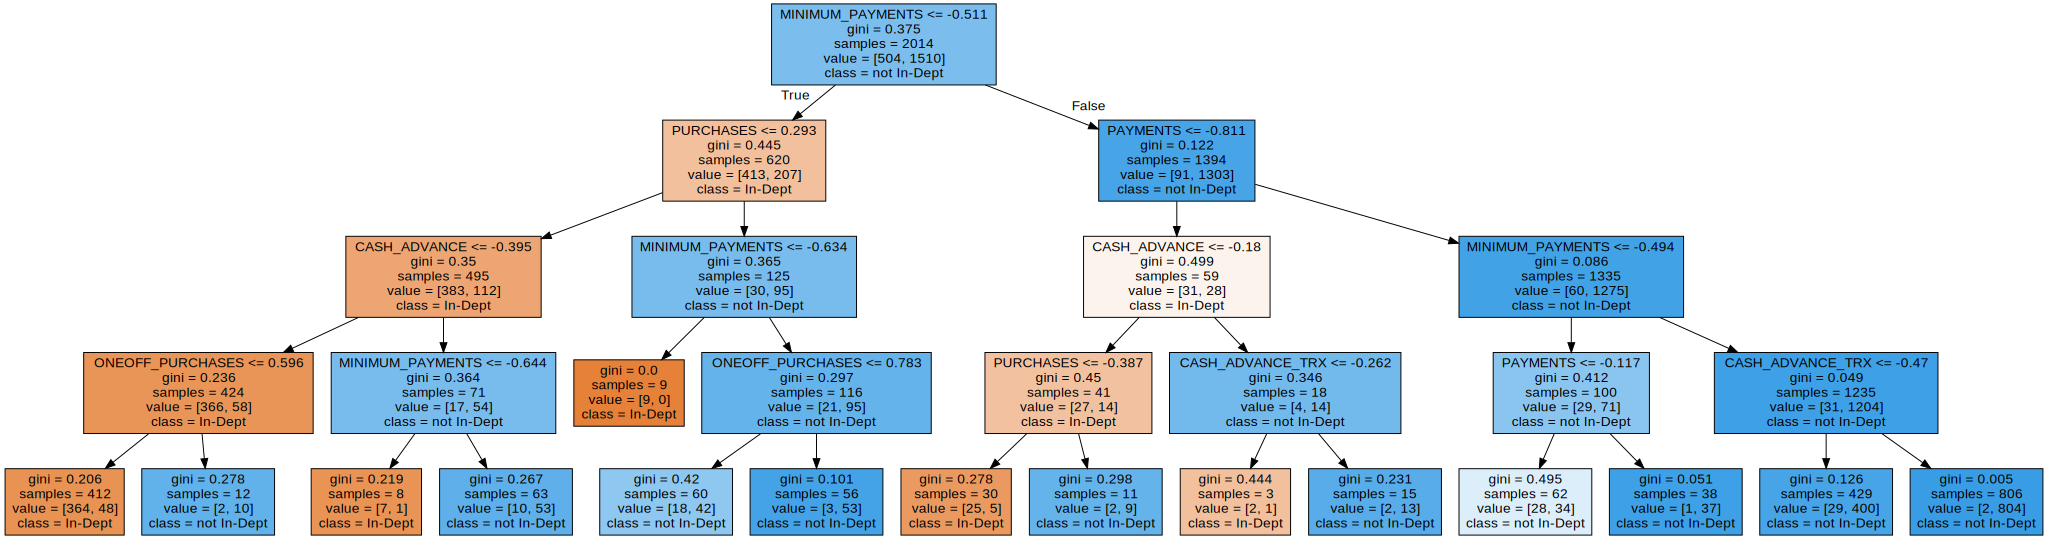

In [26]:
# visualize the decision tree
dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['In-Dept','not In-Dept'], filled=True, out_file=None) 
graphviz.Source(dot_data)

In [27]:
#apply our decision tree to the test set
testX = test_set.drop(['CUST_ID','CLASS', 'BALANCE'], axis=1)

predY = clf.predict(testX)
predictions = pd.concat([test_set[['CUST_ID', 'CLASS']], pd.Series(predY, name='Predicted Class')], axis=1)
predictions

,CUST_ID,CLASS,Predicted Class
0,C18366,not In-Dept,not In-Dept
1,C10010,not In-Dept,not In-Dept
2,C10315,not In-Dept,not In-Dept
3,C17154,not In-Dept,not In-Dept
4,C15626,In-Dept,In-Dept
...,...,...,...
498,C16330,not In-Dept,not In-Dept
499,C13464,In-Dept,In-Dept
500,C14094,In-Dept,In-Dept
501,C13217,not In-Dept,not In-Dept


In [28]:
# check the Accuracy of the model
correct = 0
for item in predictions.values:
    # print(item)
    if item[1]==item[2]:
        correct +=1
accuracy = correct/len(predictions)*100
print(f'the accuracy of our decision Tree is {accuracy}%')

the accuracy of our decision Tree is 92.84294234592446%


# 4. Clustering with K-means

In [29]:
from sklearn import cluster
data = df_values.drop(['CUST_ID'],axis=1) # what data to used for clustering, with outliers removed
data = data.reset_index(drop=True) #needed for plotting the clusters

### What number of clusters to use?

We don't know how many clusters that are optimal but the following code uses the Elbow method to find an appropriate value. The sum of the squared error for each point with respect to its centroid is plotted as a function of the number of clusters. The "elbow point" gives the optimal k for our clustering. 

In [30]:
SSE = [] #sum of square errors from points to respective centroids
K = range(1,10) #limits for k
for k in K:
    k_means = cluster.KMeans(n_clusters=k, max_iter=50, random_state=1)
    k_means.fit(data) 
    SSE.append(k_means.inertia_)

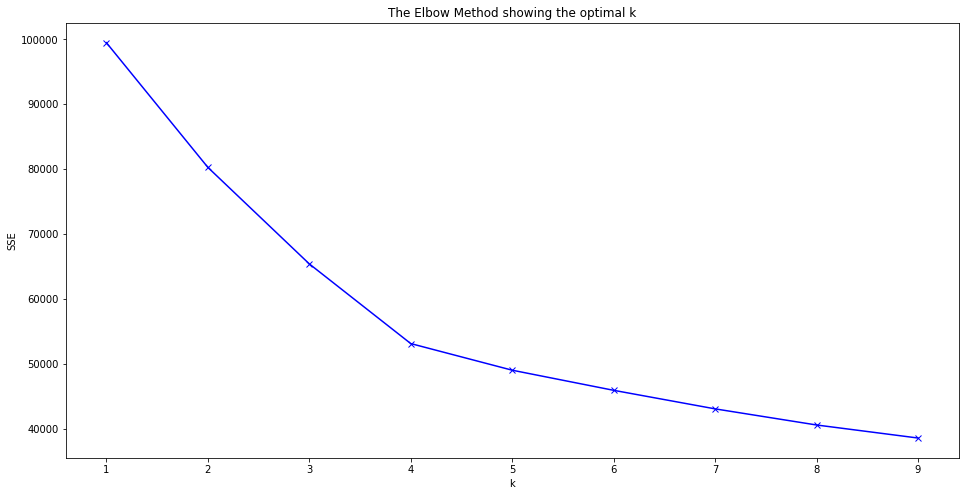

In [31]:
plt.figure(figsize=(16,8))
plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Perform the K-means clustering with optimal k

In [32]:
k_means = cluster.KMeans(n_clusters=4, max_iter=50, random_state=1) # 3 seems like a fair choice
k_means.fit(data) 
labels = k_means.labels_
pd.DataFrame(labels, index=df_values.CUST_ID, columns=['Cluster ID']) # table of CUST_ID and cluster ID

,Cluster ID
CUST_ID,
C10001,1
C10002,3
C10003,1
C10004,1
C10005,1
...,...
C19186,0
C19187,0
C19188,0


### Coordinates of the centroids

In [33]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,-0.299038,-0.335379,-0.250292,-0.291044,0.151732,0.074359,-0.402387,-0.509974,-0.488209,-0.298214,7.370370
1,-0.332127,-0.313961,-0.271929,-0.216848,-0.327276,-0.273818,-0.243208,-0.273279,-0.331037,-0.229957,11.887613
2,0.096631,1.986922,1.644080,1.486665,-0.327351,-0.337386,1.702203,0.688816,0.913670,0.042102,11.932305
3,1.539632,-0.343708,-0.246855,-0.313260,1.665833,1.485565,-0.340839,0.831938,0.856026,1.142882,11.773366


### All variables plotted w.r.t. one of the variables

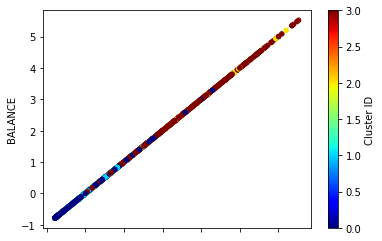

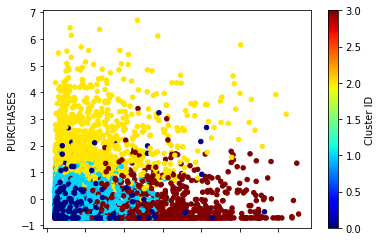

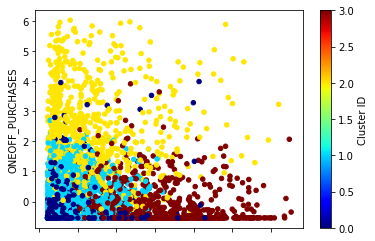

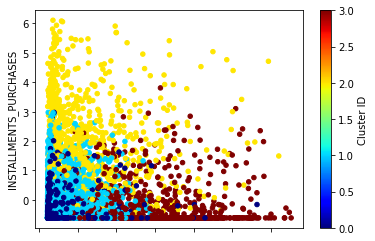

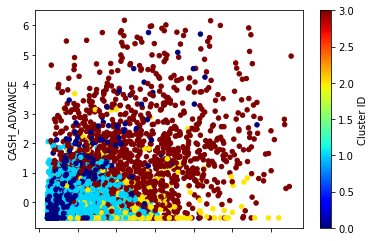

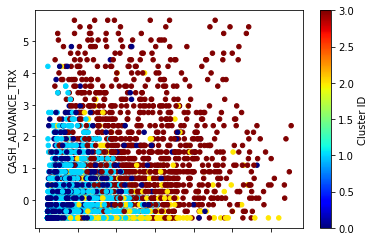

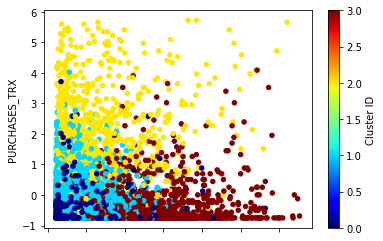

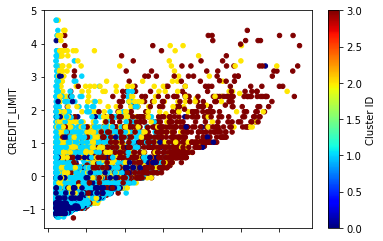

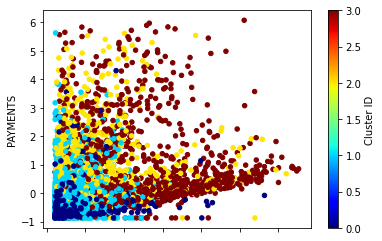

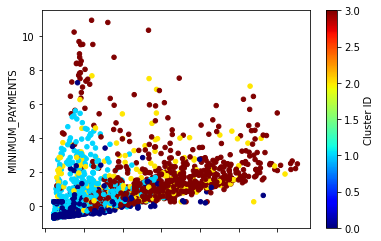

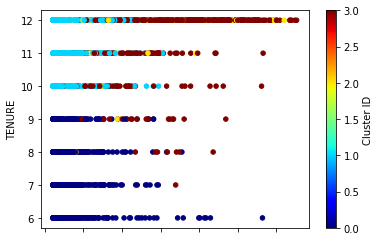

In [34]:
labels = pd.DataFrame(k_means.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)

for column in data:
    result.plot.scatter(x='BALANCE',y=column,c='Cluster ID', colormap='jet')  

The above plots only shows the clustering with BALANCE on the x-axis, but the code can be changed to see other variables too.

### Conclusion from the result

Our dataset contains many variables on card transaction information, but it is not very easy for us to interpret the raw data that is given. With this in mind, the clustering that is performed with k-means in this notebook is not very useful. Visually, the results from the clustering look okay, even though it looks like there are overlaps when plotting most variables. It is, however hard for us to deduct any useful information from the results.

From the pre-processing, and the correlation analysis in particular, we saw that several variables correlated. It might be that some variables are redundant and that fewer variables in the clustering would give better results. When it comes to deducing useful information, this could also be beneficial as it would be easier for someone without expert knowledge in the field to interpret the results. It is, for example, a lot easier to interpret a 2d plot between only 2 variables compared to 17 variables in our case. 